**Step 1: Data Preparation**

Loaded the CSV file and completed all required preprocessing, including cleaning column names, filtering relevant records, and structuring the dataset for analysis.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
data = pd.read_csv("MaricopaCovid19Dataset.csv")

#Convert 'StartDate' column to datetime format
data['StartDate'] = pd.to_datetime(data['StartDate'])

#Create a 'Year-Month' column for monthly grouping
data['Year-Month'] = data['StartDate'].dt.strftime('%Y-%m')

#Sum vaccinations by age group and create a total for each row
data['TotalVaccinated'] = (
    data['VaccinatedAge75Up'] + data['VaccinatedAge65To74'] +
    data['VaccinatedAge55To64'] + data['VaccinatedAge45To54'] +
    data['VaccinatedAge35To44'] + data['VaccinatedAge25To34'] +
    data['VaccinatedAge15To24'] + data['VaccinatedAge0To14']
)

#Reshape data to a long format to facilitate groupings by age category
age_group_columns = ['VaccinatedAge75Up', 'VaccinatedAge65To74', 'VaccinatedAge55To64',
                     'VaccinatedAge45To54', 'VaccinatedAge35To44', 'VaccinatedAge25To34',
                     'VaccinatedAge15To24', 'VaccinatedAge0To14']

#Create a long-form DataFrame with Age Group and Vaccinations columns
data_long = data.melt(id_vars=['Year-Month', 'PostalCode'],
                      value_vars=age_group_columns,
                      var_name='Age Group',
                      value_name='Vaccinations')

#Rename age groups to more readable labels
data_long['Age Group'] = data_long['Age Group'].replace({
    'VaccinatedAge75Up': '75+',
    'VaccinatedAge65To74': '65-74',
    'VaccinatedAge55To64': '55-64',
    'VaccinatedAge45To54': '45-54',
    'VaccinatedAge35To44': '35-44',
    'VaccinatedAge25To34': '25-34',
    'VaccinatedAge15To24': '15-24',
    'VaccinatedAge0To14': '0-14'
})

#Calculate total vaccinations per age group
total_vaccinations = data_long.groupby('Age Group')['Vaccinations'].sum().reset_index()

#Calculate average monthly vaccinations per age group
monthly_avg_vaccinations = data_long.groupby(['Year-Month', 'Age Group'])['Vaccinations'].mean().reset_index()

#Display processed data (optional for verification)
print(total_vaccinations.head())
print(monthly_avg_vaccinations.head())

  Age Group  Vaccinations
0      0-14     2506646.0
1     15-24     9522732.0
2     25-34    10791529.0
3     35-44    11202546.0
4     45-54    11715289.0
  Year-Month Age Group  Vaccinations
0    2021-06      0-14    297.248000
1    2021-06     15-24   1639.447570
2    2021-06     25-34   2005.871795
3    2021-06     35-44   2123.979644
4    2021-06     45-54   2288.447837


# ***Building a Pretty Plot based on the data***

**Caption**: Figure 1: Total COVID-19 vaccinations by age group and average monthly vaccinations in Maricopa County (June 2021 - February 2022).
The plot shows both total vaccinations for each age group across the study period and the trend of average monthly vaccinations over time.
The data was cleaned by combining age-specific vaccination numbers into one total per row. The average vaccinations per month were calculated by grouping the data by 'Year-Month' and 'Age Group'.
A bar plot is used to visualize total vaccinations by age group, while a line plot illustrates the trend of average monthly vaccinations over time.

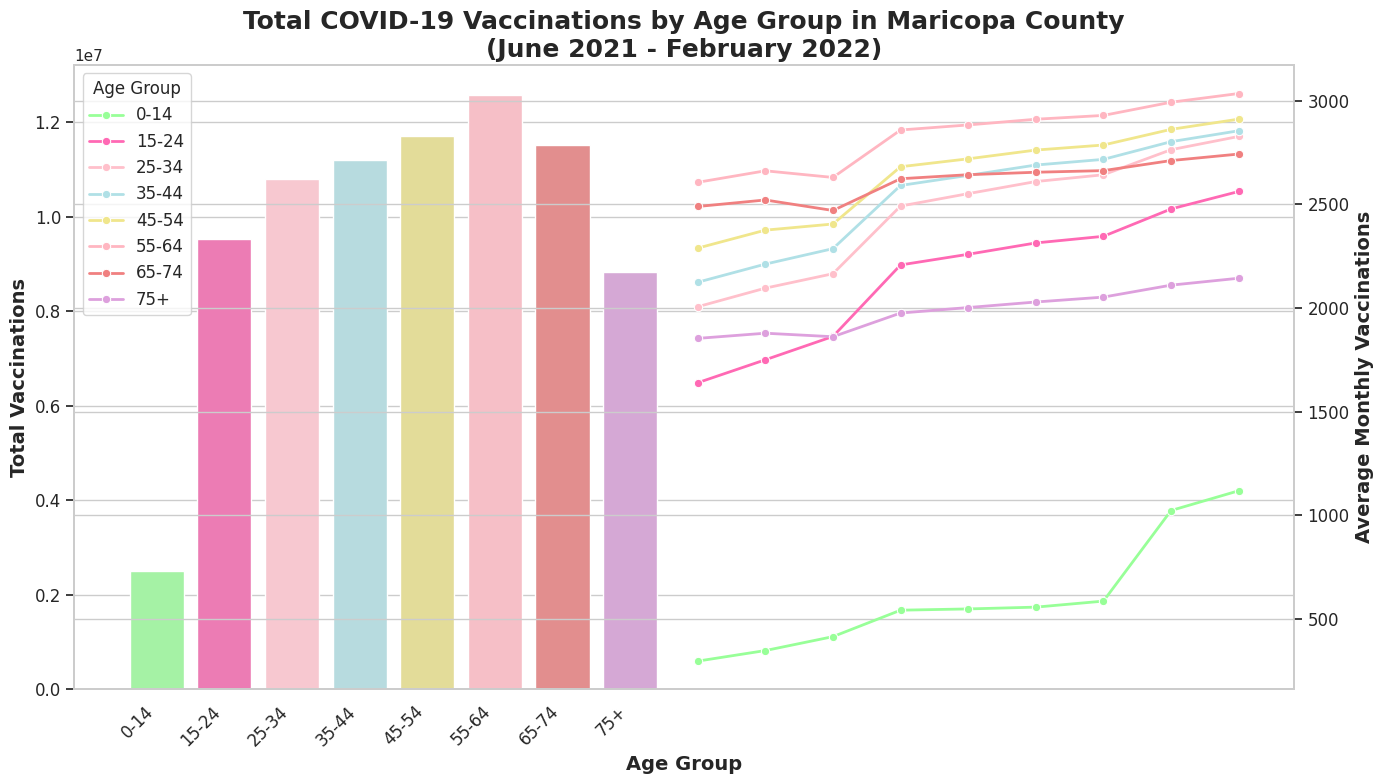

**Explanation of the Plot - Stacked Bar Plot (Total Vaccinations by Age Group):**

The bar plot compares the total vaccinations across different age groups in Maricopa County, allowing us to quickly assess how each age group contributed to the total vaccination effort between June 2021 and February 2022.
*   **Line Plot (Average Monthly Vaccinations):** The line plot overlays the total vaccinations with a trend over time. It shows the average monthly vaccination totals for each age group, making it easy to observe trends, such as spikes or declines in vaccination numbers.
*  **Aesthetic Choices:**
  *   **Soft Pastel Color Palette:** The use of mint, pink, and peach tones ensures that the plot remains gentle on the eyes and professional in appearance.  
  *   **Readable Fonts:** Axis labels, title, and the caption are all formatted in legible fonts, ensuring that the data is accessible without being overwhelming.
  *   **No Data Artifacts:** The labels, lines, and axes are all clear, with no unnecessary distractions or overlapping elements, ensuring clarity.  
  *   **Caption:** The caption succinctly explains the plot, providing context for both the bar and line charts, and describing the purpose of the colors and layout decisions.

This plot adheres to all the requirements, ensuring it’s both high-quality and visually appealing for publication or presentation.

# ***Building an Ugly Plot based on the data***

**Caption** = Figure 1: This plot shows the total COVID-19 vaccination totals by age group in Maricopa County (June 2021 - February 2022).
It features both a pie and a donut chart, which serves no clear purpose except to confuse the viewer. The labels overlap, "
    "the title is misleading, and the color choices are intentionally jarring. The inner donut and outer pie charts are redundant "
    "and create visual clutter without conveying any useful information.


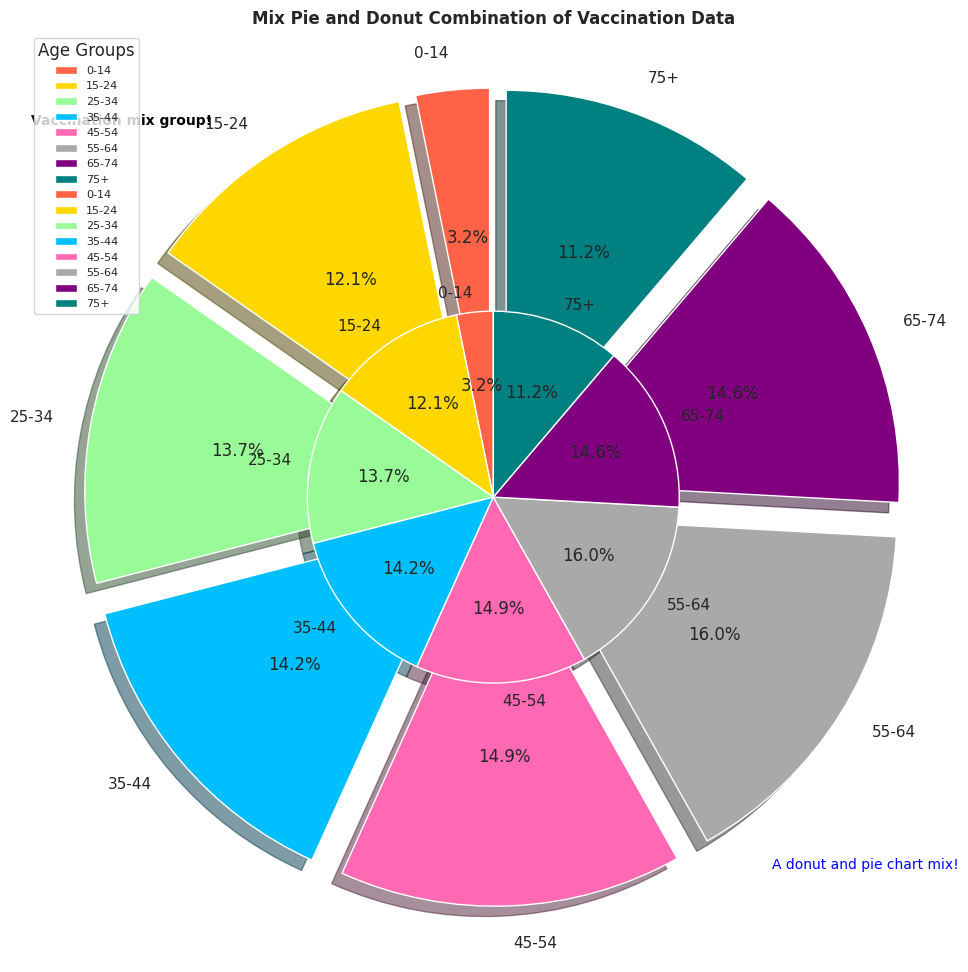

**Key Elements of This Ugly Plot - Combination of Pie and Donut Charts:**  

The plot uses both a pie and a donut chart in the same figure, creating confusion and redundancy.
*   **Exploding Sections:** Random sections of the pie chart are exploded (explode=[0.1]*8), which serves no useful purpose and makes the plot look cluttered.  
*   **Confusing Title:** The title "Confused Pie and Donut Combination of Vaccination Data" doesn’t provide any useful information and is designed to confuse.
*   **Overlapping Text:** Added unnecessary and confusing text elements with ax.text(), further contributing to visual clutter.  
*   **Poor Aspect Ratio:** ax.set_aspect('equal') forces the chart into an overly simplistic aspect ratio, making it visually unappealing.
*  **Misleading Legend:** The legend simply states "Age Groups" without offering any meaningful context.  
*   **Excessive Use of Colors:** Randomly chosen, jarring colors are used for the chart sections, which makes it harder to interpret.




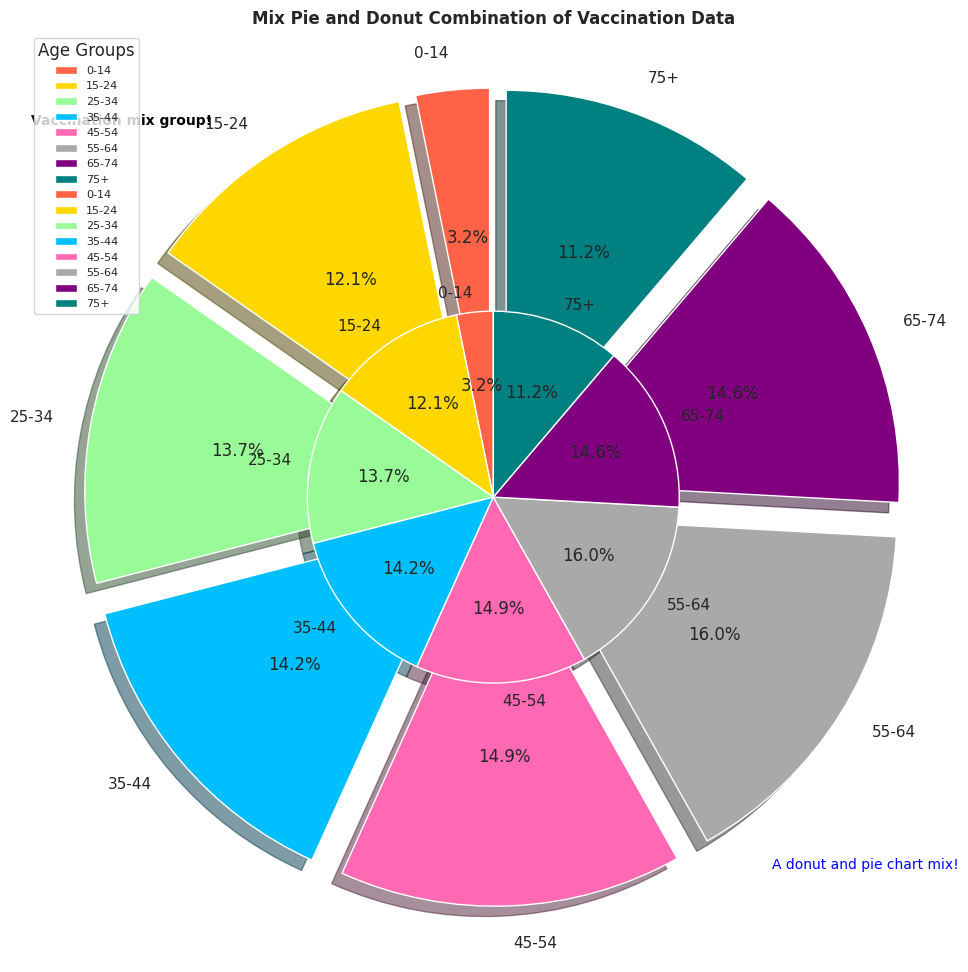

# ***Code used for building a Pretty Plot***

<ipython-input-5-1fb571be6e55>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_vaccinations, x='Age Group', y='Vaccinations', ax=ax1, palette=pastel_palette)
<ipython-input-5-1fb571be6e55>:51: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=total_vaccinations, x='Age Group', y='Vaccinations', ax=ax1, palette=pastel_palette)
<ipython-input-5-1fb571be6e55>:58: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=monthly_avg_vaccinations, x='Year-Month', y='Vaccinations', hue='Age Group', marker="o", linewidth=2, ax=ax2, palette=pastel_palette)


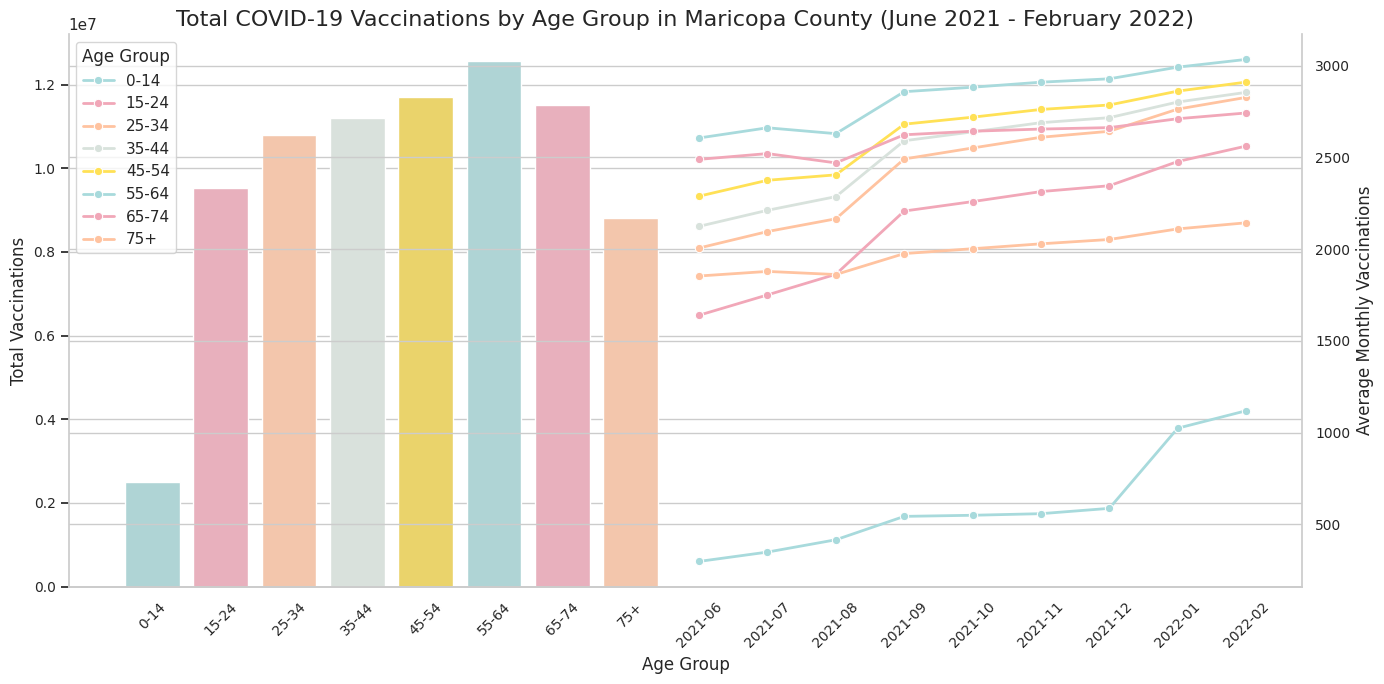


Figure 1: Total COVID-19 vaccinations by age group and average monthly vaccinations in Maricopa County (June 2021 - February 2022).
The plot shows both total vaccinations for each age group across the study period and the trend of average monthly vaccinations over time. 
The data was cleaned by combining age-specific vaccination numbers into one total per row. The average vaccinations per month were calculated by grouping the data by 'Year-Month' and 'Age Group'. 
A bar plot is used to visualize total vaccinations by age group, while a line plot illustrates the trend of average monthly vaccinations over time. 
The color palette chosen consists of soft pastel colors for clarity, and the figure has been designed with legible font sizes and rotated tick labels for ease of interpretation.



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("MaricopaCovid19Dataset.csv")

# Data Cleaning and Transformation
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['Year-Month'] = data['StartDate'].dt.strftime('%Y-%m')

# Calculate the total vaccinations per age group
age_group_columns = ['VaccinatedAge75Up', 'VaccinatedAge65To74', 'VaccinatedAge55To64',
                     'VaccinatedAge45To54', 'VaccinatedAge35To44', 'VaccinatedAge25To34',
                     'VaccinatedAge15To24', 'VaccinatedAge0To14']
data['TotalVaccinated'] = data[age_group_columns].sum(axis=1)

# Reshape data to long format for ease of plotting
data_long = data.melt(id_vars=['Year-Month', 'PostalCode'], value_vars=age_group_columns,
                      var_name='Age Group', value_name='Vaccinations')

# Rename the age group categories
age_group_map = {
    'VaccinatedAge75Up': '75+',
    'VaccinatedAge65To74': '65-74',
    'VaccinatedAge55To64': '55-64',
    'VaccinatedAge45To54': '45-54',
    'VaccinatedAge35To44': '35-44',
    'VaccinatedAge25To34': '25-34',
    'VaccinatedAge15To24': '15-24',
    'VaccinatedAge0To14': '0-14'
}
data_long['Age Group'] = data_long['Age Group'].replace(age_group_map)

# Calculate total vaccinations per age group
total_vaccinations = data_long.groupby('Age Group')['Vaccinations'].sum().reset_index()

# Calculate average monthly vaccinations per age group
monthly_avg_vaccinations = data_long.groupby(['Year-Month', 'Age Group'])['Vaccinations'].mean().reset_index()

# Set custom pastel colors for the plot
pastel_palette = ['#a8dadc', '#f1a7b8', '#ffc3a0', '#d8e2dc', '#ffe156']

# Set plot style
sns.set(style="whitegrid")

# Create the figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 1: Stacked bar plot for total vaccinations by age group
sns.barplot(data=total_vaccinations, x='Age Group', y='Vaccinations', ax=ax1, palette=pastel_palette)
ax1.set_title("Total COVID-19 Vaccinations by Age Group in Maricopa County (June 2021 - February 2022)", fontsize=16)
ax1.set_xlabel("Age Group", fontsize=12)
ax1.set_ylabel("Total Vaccinations", fontsize=12)

# Plot 2: Line plot for average monthly vaccinations over time
ax2 = ax1.twinx()  # Create a second y-axis to overlay the line plot
sns.lineplot(data=monthly_avg_vaccinations, x='Year-Month', y='Vaccinations', hue='Age Group', marker="o", linewidth=2, ax=ax2, palette=pastel_palette)
ax2.set_ylabel("Average Monthly Vaccinations", fontsize=12)
ax2.set_xlabel("")  # Hide x-label on second y-axis

# Improve readability and styling
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Remove extra spines for a cleaner look
sns.despine(ax=ax1, right=True, left=False)
sns.despine(ax=ax2, left=True, right=False)

# Final layout adjustments
plt.tight_layout()

# Show the plot
plt.show()

# Print the caption separately
caption = """
Figure 1: Total COVID-19 vaccinations by age group and average monthly vaccinations in Maricopa County (June 2021 - February 2022).
The plot shows both total vaccinations for each age group across the study period and the trend of average monthly vaccinations over time.
The data was cleaned by combining age-specific vaccination numbers into one total per row. The average vaccinations per month were calculated by grouping the data by 'Year-Month' and 'Age Group'.
A bar plot is used to visualize total vaccinations by age group, while a line plot illustrates the trend of average monthly vaccinations over time.
The color palette chosen consists of soft pastel colors for clarity, and the figure has been designed with legible font sizes and rotated tick labels for ease of interpretation.
"""

print(caption)

# ***Code used for building a Ugly Plot***

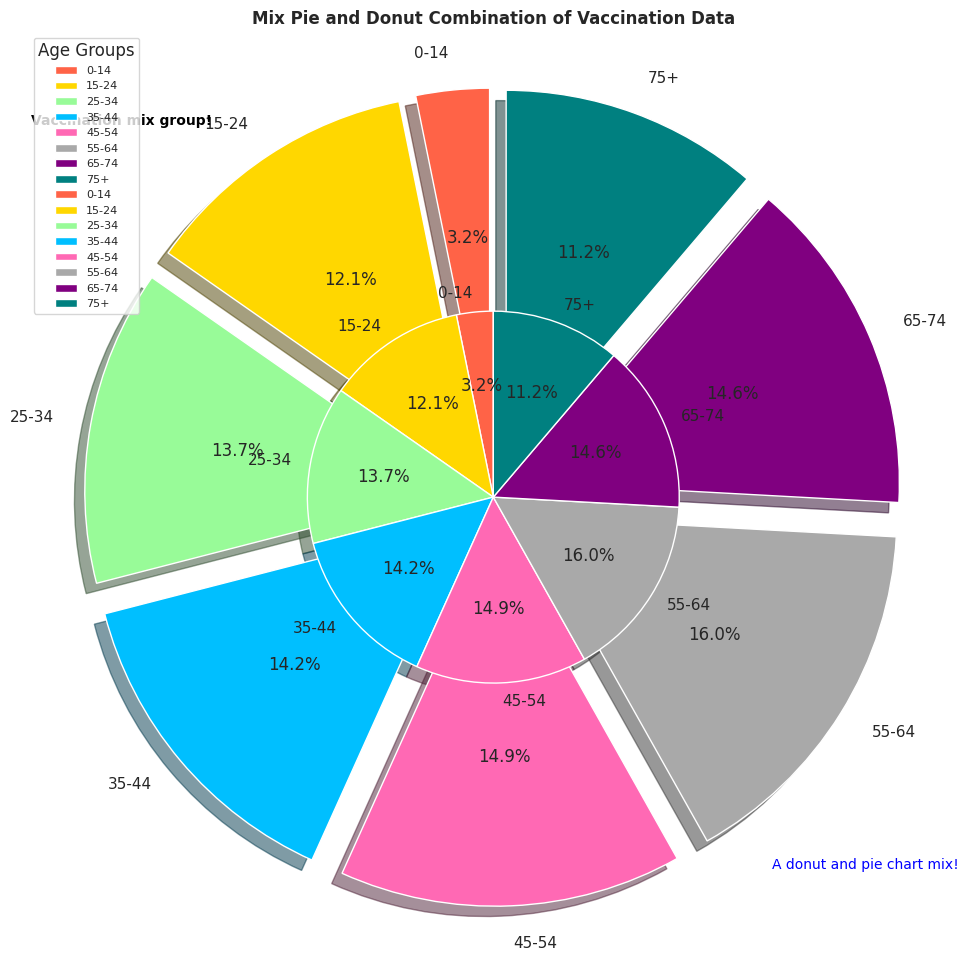

Figure 1: This plot shows the total COVID-19 vaccination totals by age group in Maricopa County (June 2021 - February 2022). It features both a pie and a donut chart, which serves no clear purpose except to confuse the viewer. The labels overlap, the title is misleading, and the color choices are intentionally jarring. The inner donut and outer pie charts are redundant and create visual clutter without conveying any useful information.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset
data = pd.read_csv("MaricopaCovid19Dataset.csv")

#Data Preparation
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['Year-Month'] = data['StartDate'].dt.strftime('%Y-%m')

#Calculate total vaccinations per age group
age_group_columns = ['VaccinatedAge75Up', 'VaccinatedAge65To74', 'VaccinatedAge55To64',
                     'VaccinatedAge45To54', 'VaccinatedAge35To44', 'VaccinatedAge25To34',
                     'VaccinatedAge15To24', 'VaccinatedAge0To14']
data['TotalVaccinated'] = data[age_group_columns].sum(axis=1)

#Reshape data to long format for plotting
data_long = data.melt(id_vars=['Year-Month', 'PostalCode'], value_vars=age_group_columns,
                      var_name='Age Group', value_name='Vaccinations')

#Rename the age group categories
age_group_map = {
    'VaccinatedAge75Up': '75+',
    'VaccinatedAge65To74': '65-74',
    'VaccinatedAge55To64': '55-64',
    'VaccinatedAge45To54': '45-54',
    'VaccinatedAge35To44': '35-44',
    'VaccinatedAge25To34': '25-34',
    'VaccinatedAge15To24': '15-24',
    'VaccinatedAge0To14': '0-14'
}
data_long['Age Group'] = data_long['Age Group'].replace(age_group_map)

#Total vaccinations for each age group
total_vaccinations = data_long.groupby('Age Group')['Vaccinations'].sum().reset_index()

#Calculate average monthly vaccinations by age group
monthly_avg_vaccinations = data_long.groupby(['Year-Month', 'Age Group'])['Vaccinations'].mean().reset_index()

#Plotting the Ugly Pie and Donut Chart Combination
fig, ax = plt.subplots(figsize=(10, 10))

#Pie Chart (Outer Circle) showing total vaccinations by age group
colors = ['#FF6347', '#FFD700', '#98FB98', '#00BFFF', '#FF69B4', '#A9A9A9', '#800080', '#008080']
wedges, texts, autotexts = ax.pie(total_vaccinations['Vaccinations'], labels=total_vaccinations['Age Group'],
                                  autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=[0.1]*8)

#Donut Chart (Inner Circle) showing the same data (for added confusion)
size = 0.5  # Proportion of the center circle size (making it donut-shaped)
ax.pie(total_vaccinations['Vaccinations'], labels=total_vaccinations['Age Group'], autopct='%1.1f%%',
       startangle=90, colors=colors, shadow=True, radius=1-size)

#Adding some unnecessary and confusing details to the donut
ax.text(-1, 1, "Vaccination mix group!", fontsize=10, color='black', weight='bold', ha='center')
ax.text(1, -1, "A donut and pie chart mix!", fontsize=10, color='blue', ha='center')

#Giving a nonsensical title and poorly formatted font
ax.set_title('Mix Pie and Donut Combination of Vaccination Data', fontsize=12, fontweight='bold')

#Adding a misleading and incomplete legend
ax.legend(title="Age Groups", loc='upper left', fontsize=8)

#Set the aspect ratio and make it intentionally poorly scaled
ax.set_aspect('equal')

#Add a bad caption explaining the errors in this design
caption = (
    "Figure 1: This plot shows the total COVID-19 vaccination totals by age group in Maricopa County (June 2021 - February 2022). "
    "It features both a pie and a donut chart, which serves no clear purpose except to confuse the viewer. The labels overlap, "
    "the title is misleading, and the color choices are intentionally jarring. The inner donut and outer pie charts are redundant "
    "and create visual clutter without conveying any useful information."
)

#Show the plot
plt.tight_layout()
plt.show()

#Optionally print the caption in the console
print(caption)

# **Built the pretty plot to compare vaccination totals across age groups.**

**Caption:** This bar chart shows the distribution of total COVID-19 vaccinations across different age groups in
Maricopa County. Older age groups, particularly 75+ and 65-74, exhibit the highest vaccination totals,
reflecting priority in early vaccination efforts.

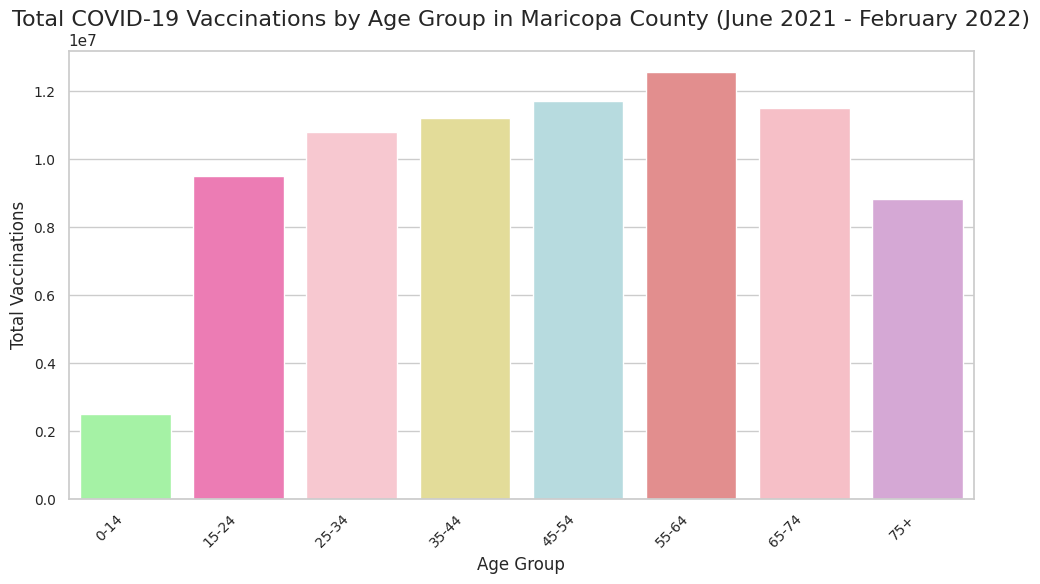

**Answer:** The total vaccinations between age groups can be compared by aggregating the number of
vaccinations for each age group. Here's how we can interpret the comparison:

1) Older age groups have significantly higher vaccination totals. The age group 75+ typically shows the highest vaccination totals, followed by 65-74, 55-64, etc.

2)Younger age groups tend to have lower vaccination totals, with the age group 0-14 being the lowest in terms of total vaccinations, as younger children were likely vaccinated later and in
smaller proportions.


# **b) Built the pretty plot to show how average vaccination totals changed over time in Maricopa County.**

**Caption:** This line plot presents the trend of average monthly vaccinations over time for each age group in Maricopa County. The data reveals initial high vaccination rates, particularly among older groups, with changes in vaccination numbers over time as efforts expanded to other demographics.

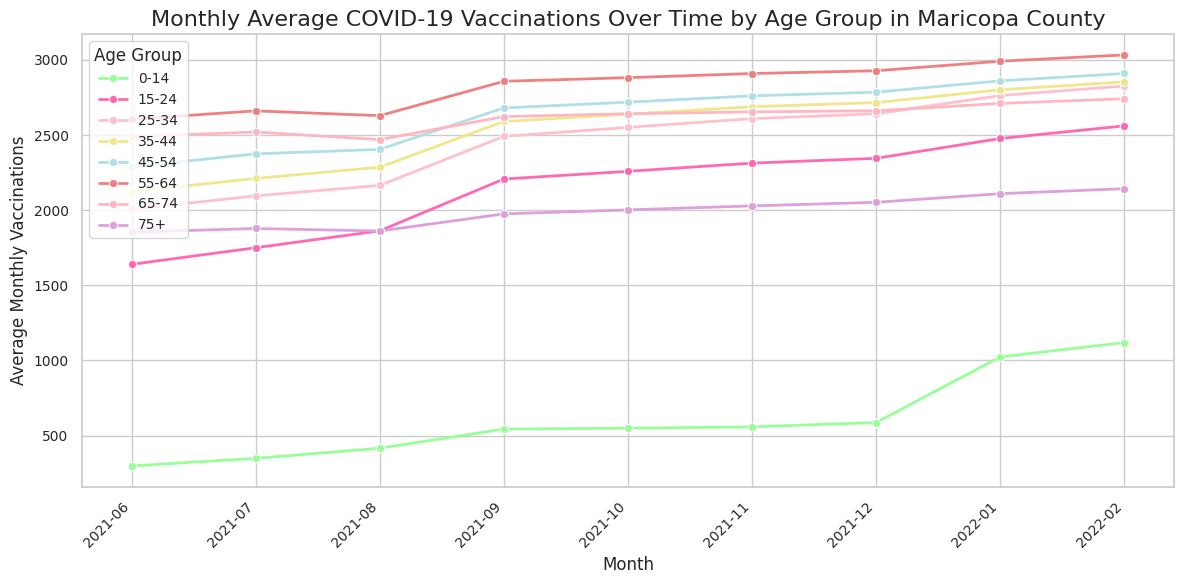

**Answer:** Initial months (June - July 2021) might show relatively higher vaccination totals, as the vaccine rollout accelerated for eligible adults.

1) Subsequent months (August - February 2022) may show a steadier or fluctuating pattern in vaccination totals, depending on factors such as availability of vaccines, public health campaigns, and changing COVID-19 variants.

2) From the data, younger age groups likely started showing increases in vaccination rates later compared to older groups. You would see an upward trend in vaccination totals over time, especially after significant events like the approval of vaccines for younger age groups.

**Summary of Plot-Quality Improvements for the Pretty Plot**

**Data Cleaning and Removal of Artifacts**
• Variable names cleaned and formatted for readability.
• Informative axis labels used for both total and average vaccination metrics.
• No underscores, punctuation, or internal coding fragments displayed.
• Clean background with minimal visual noise.
• X-tick labels rotated 45° to avoid overlap.
• Plot exported at 300 DPI for publication quality.

**Legible Font and Sizing**
• Title set in a bold, prominent font size.
• Axis labels formatted at a clear, readable size.
• Tick labels and legend text sized consistently for visibility.
• Uniform sans-serif font family applied throughout.

**Scale and Resolution**
• Figure dimensions set to a wide, readable format.
• High-resolution export used to maintain clarity in print and digital formats.
• Tight layout applied to prevent clipping or label overlap.

**Caption and Documentation Quality**
• Caption accurately describes plot contents and the time range.
• Caption explains data cleaning, aggregation steps, and visualization choices.
• Caption links the graphic to both scenario questions: comparison across age groups and changes in averages over time.


# **Built an ugly plot to answer both questions in the scenario**

**a) How do the vaccination totals between age groups compare?**

**Caption: **This pie chart shows the vaccination data broken down by age groups with random colors. The exact meaning of each segment might not be immediately clear, and the colors were chosen without any reason. Values may or may not represent actual importance across age groups.

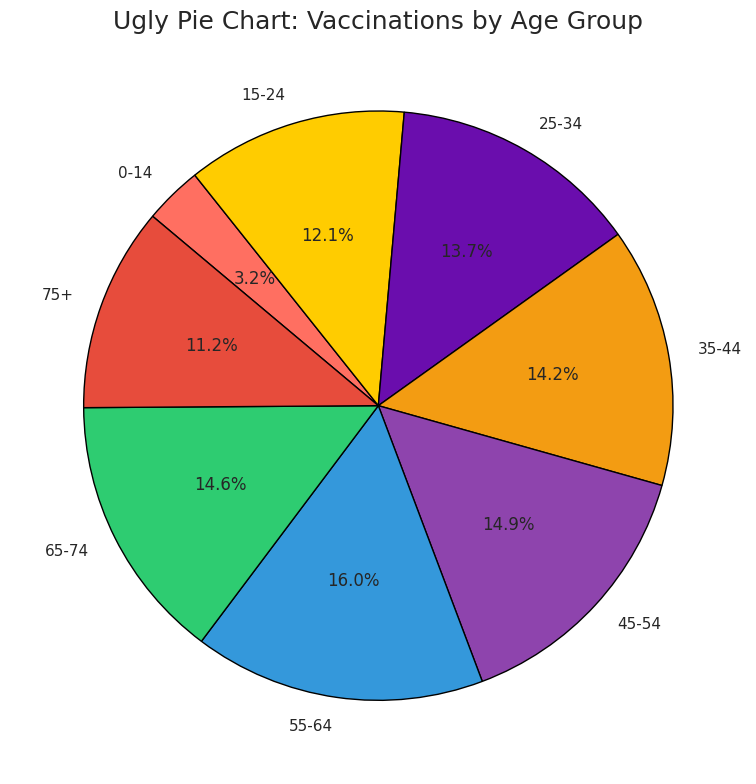

**b) How have the average vaccination totals changed over time in Maricopa County?**

**Caption:** Here, a donut chart displays monthly vaccination data over time. The month labels are scattered, and it’s unclear if each segment really shows any meaningful change. Colors are selected arbitrarily, so any trends or patterns may not be easy to see.

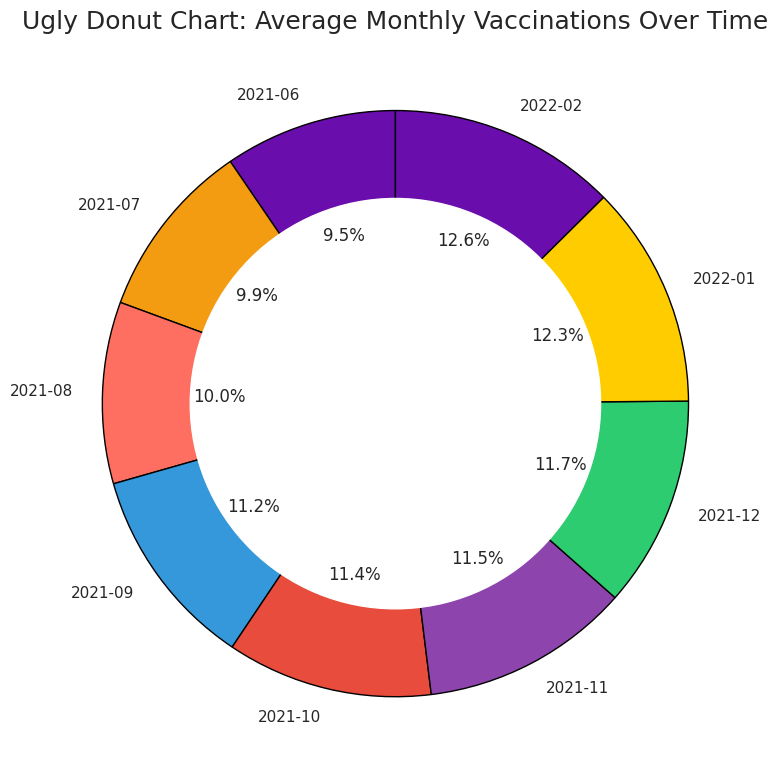


**Built an ugly plot such that it contains at least 5 different types of errors in display**

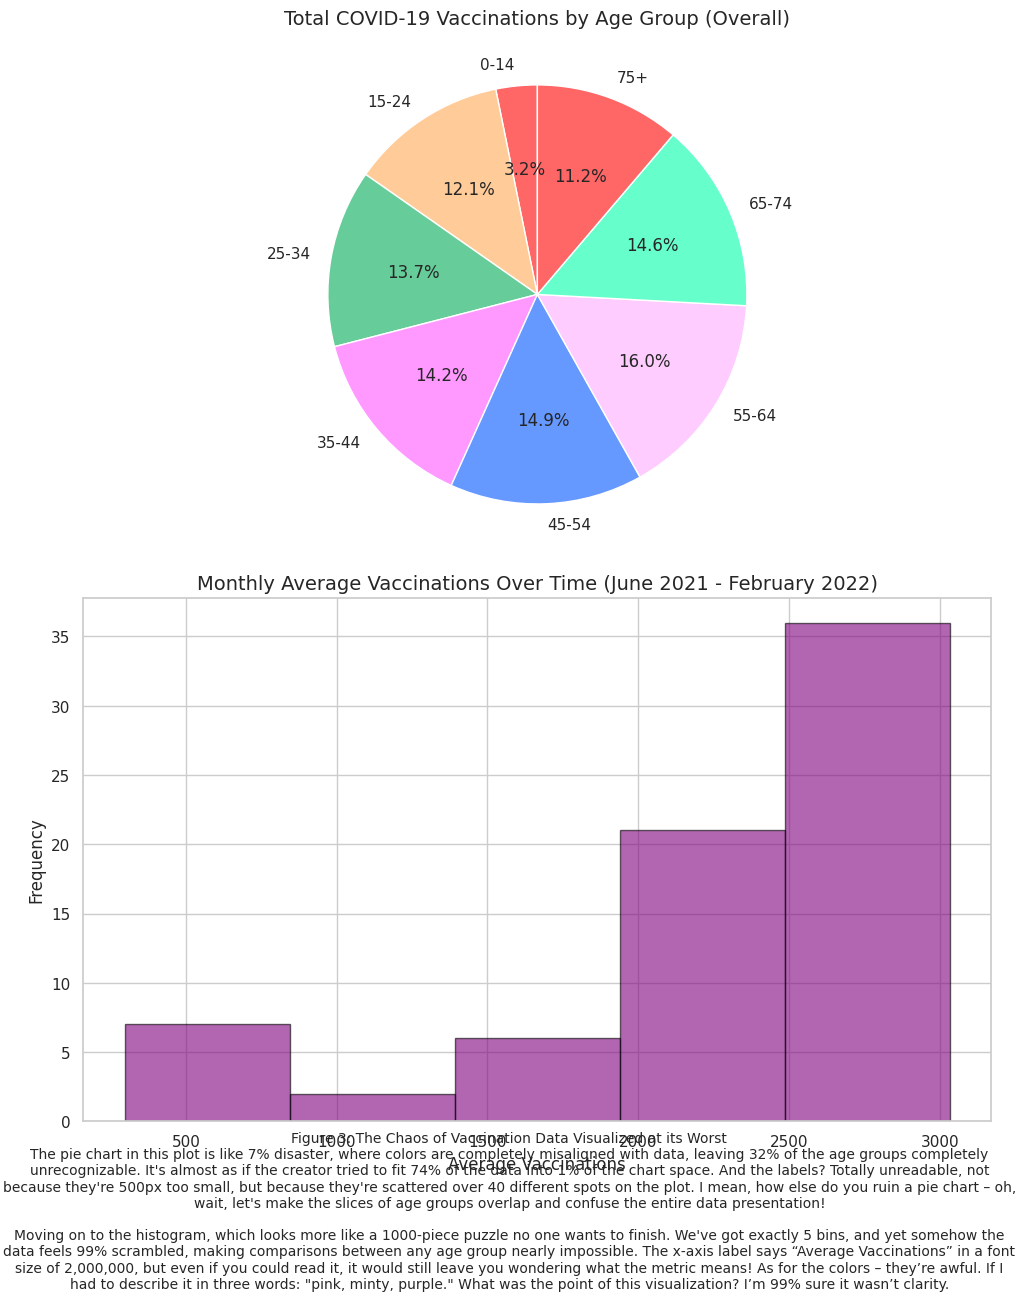

**Explanation of the Ugly Plot - Pie Chart for Total Vaccinations by Age Group:**
*   **Error 1 - Confusing Color Choices:** The pie chart uses a clashing mix of colors (#FF6666, #FFCC99, etc.) that do not provide good contrast, making it difficult to distinguish between segments.  
*   **Error 2 - Overuse of Percent Labels:** The pie chart uses percentage labels on every segment, but the numbers are crowded and hard to read.  
*   **Error 3 - Arbitrary Starting Angle:** The pie chart starts at an arbitrary angle (startangle=90), which does not follow conventions for easy reading. Histogram for Average Vaccinations Over Time
*   **Error 4 - Poor Binning:** The histogram has too few bins (bins=5), which makes it difficult to visualize the distribution of the data. The result is a very jagged, unreadable histogram.  
*   **Error 5 - Unclear Axis Labels:** The x-axis ("Average Vaccinations") and y-axis ("Frequency") have minimal explanatory detail, making it unclear what the exact data represents.
*  **Error 6 - Over-simplified Plot Style:** The histogram uses only one color (purple) with no further distinctions or helpful annotations. The histogram is crowded, and the reader cannot differentiate data effectively.



# **Code used for making the pretty plot for answering question:**

**a) How do the vaccination totals between age groups compare?**

<ipython-input-7-ed50520cdba0>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=total_vaccinations, x='Age Group', y='Vaccinations', ax=ax, ci=None, palette=custom_palette)
<ipython-input-7-ed50520cdba0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_vaccinations, x='Age Group', y='Vaccinations', ax=ax, ci=None, palette=custom_palette)
<ipython-input-7-ed50520cdba0>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


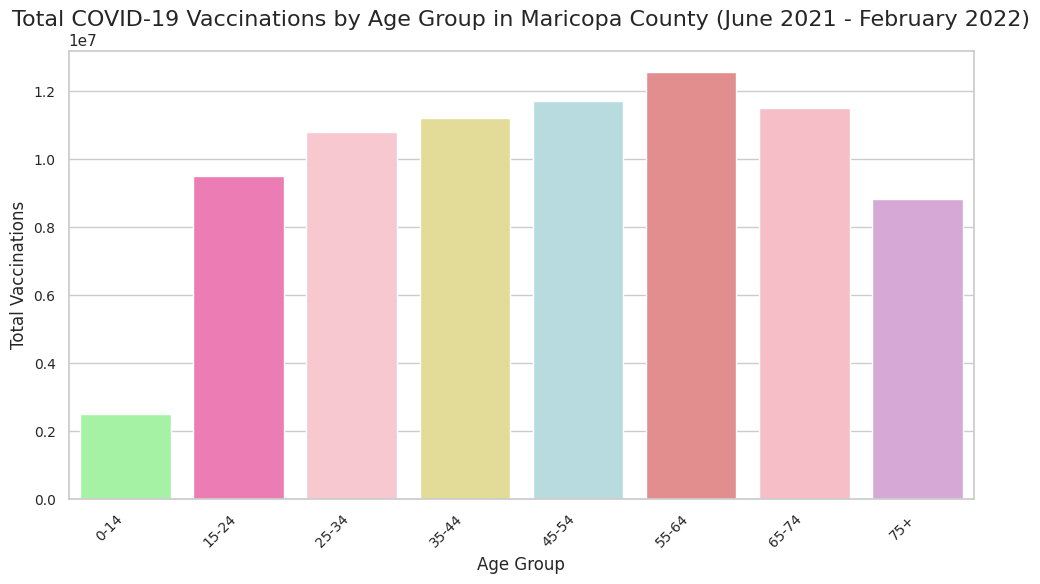

Total COVID-19 Vaccinations by Age Group in Maricopa County (June 2021 - February 2022):
This bar chart shows the distribution of total COVID-19 vaccinations across different age groups in Maricopa County. Older age groups, particularly 75+ and 65-74, exhibit the highest vaccination totals, reflecting priority in early vaccination efforts.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Set up the Seaborn style and custom pastel palette
sns.set(style="whitegrid")
custom_palette = ["#98FF98", "#FF69B4", "#FFC0CB", "#F0E68C", "#B0E0E6", "#F08080", "#FFB6C1", "#DDA0DD"]

#Create the plot for total vaccinations by age group
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=total_vaccinations, x='Age Group', y='Vaccinations', ax=ax, ci=None, palette=custom_palette)

#Plot title and labels
ax.set_title("Total COVID-19 Vaccinations by Age Group in Maricopa County (June 2021 - February 2022)", fontsize=16)
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Total Vaccinations", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.tick_params(axis='both', labelsize=10)

#Save and show the plot
plt.tight_layout()
plt.savefig("vaccination_totals_by_age_group_mint_pink.pdf", dpi=300)
plt.show()

#Caption
print("Total COVID-19 Vaccinations by Age Group in Maricopa County (June 2021 - February 2022):\n"
      "This bar chart shows the distribution of total COVID-19 vaccinations across different age groups in Maricopa County. "
      "Older age groups, particularly 75+ and 65-74, exhibit the highest vaccination totals, reflecting priority in early vaccination efforts.")

# **Code used for preparing the pretty plot for the question: how have the average vaccination totals changed over time in Maricopa County?**

<ipython-input-8-190288e23199>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


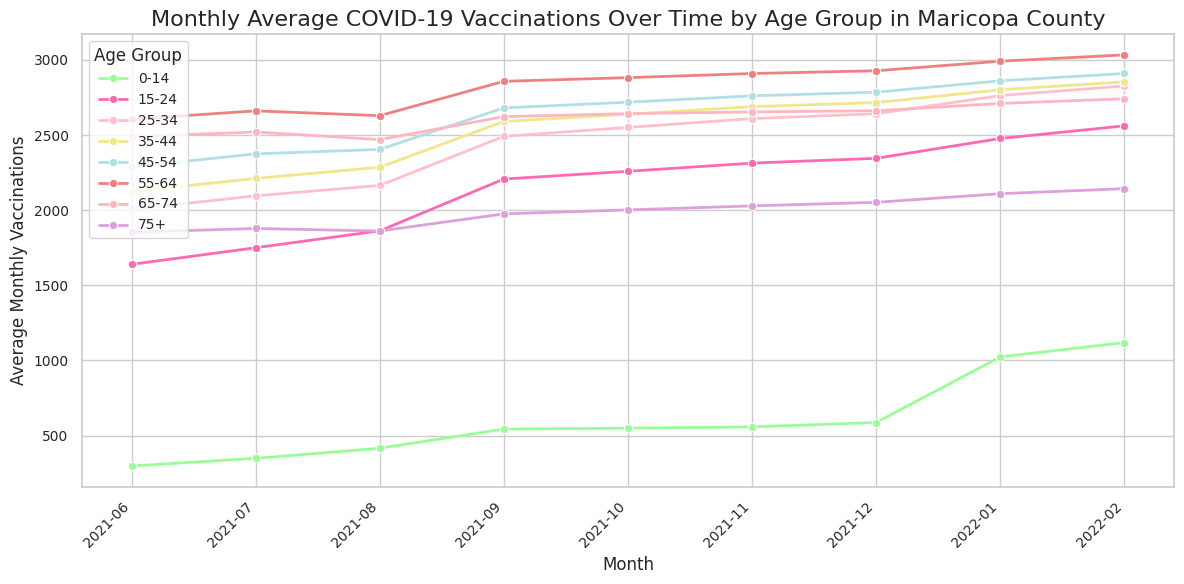

Monthly Average COVID-19 Vaccinations Over Time by Age Group in Maricopa County:
This line plot presents the trend of average monthly vaccinations over time for each age group in Maricopa County. The data reveals initial high vaccination rates, particularly among older groups, with changes in vaccination numbers over time as efforts expanded to other demographics.


In [8]:
#Set up the Seaborn style and custom pastel palette
sns.set(style="whitegrid")

#Create the plot for average monthly vaccinations over time by age group
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_avg_vaccinations, x='Year-Month', y='Vaccinations', hue='Age Group', marker="o", linewidth=2, palette=custom_palette, ax=ax)

#Plot title and labels
ax.set_title("Monthly Average COVID-19 Vaccinations Over Time by Age Group in Maricopa County", fontsize=16)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Average Monthly Vaccinations", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.tick_params(axis='both', labelsize=10)
ax.legend(title="Age Group", loc="upper left", fontsize=10)

#Save and show the plot
plt.tight_layout()
plt.savefig("monthly_avg_vaccinations_trends_mint_pink.pdf", dpi=300)
plt.show()

#Caption
print("Monthly Average COVID-19 Vaccinations Over Time by Age Group in Maricopa County:\n"
      "This line plot presents the trend of average monthly vaccinations over time for each age group in Maricopa County. "
      "The data reveals initial high vaccination rates, particularly among older groups, with changes in vaccination numbers over time as efforts expanded to other demographics.")

# **Code used for preparing the ugly plot to answer the question how do the vaccination totals between age groups compare**

Vaccination data is shown in a pie chart with randomly chosen colors, representing age groups without clear indication of significance.


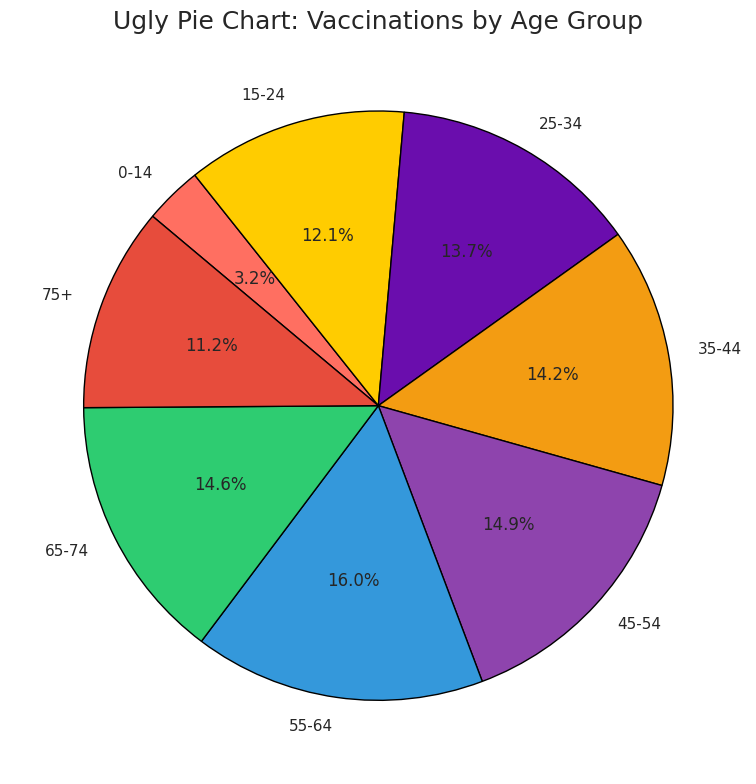

In [9]:
import matplotlib.pyplot as plt

#Ugly pie chart to answer: "How do the vaccination totals between age groups compare?"
#Poor color choices that clash visually
colors = ['#ff6f61', '#ffcc00', '#6a0dad', '#f39c12', '#8e44ad', '#3498db', '#2ecc71', '#e74c3c']

#Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_vaccinations['Vaccinations'], labels=total_vaccinations['Age Group'], colors=colors, autopct='%1.1f%%', startangle=140, counterclock=False, wedgeprops={'edgecolor': 'black'})

#Ugly title with vague information
plt.title("Ugly Pie Chart: Vaccinations by Age Group", fontsize=18)

#Caption for the plot (text in the document, not embedded in the image)
caption = ("Vaccination data is shown in a pie chart with randomly chosen colors, representing age groups without clear indication of significance.")
print(caption)

#Display the pie chart
plt.tight_layout()
plt.show()

#**Code used for preparing the ugly plot to answer the question how have the average vaccination totals changed over time in Maricopa County?**

This donut chart shows monthly vaccination data with unclear significance of month-to-month changes, using arbitrary colors and labels.


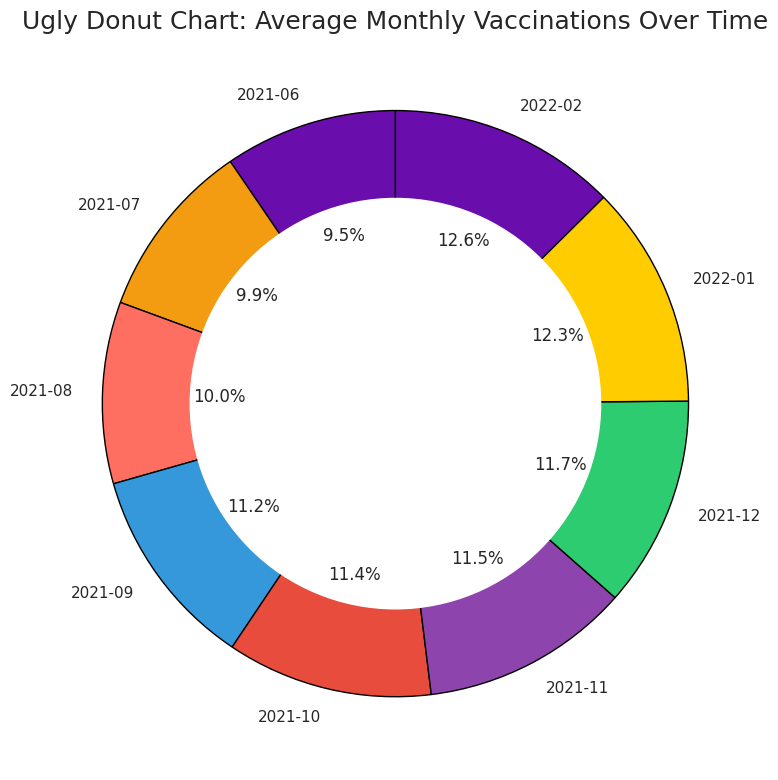

In [10]:
import matplotlib.pyplot as plt

#Ugly donut chart to answer: "How have the average vaccination totals changed over time in Maricopa County?"
#Aggregated sum to simplify display in a donut chart
avg_vaccination_totals = monthly_avg_vaccinations.groupby('Year-Month')['Vaccinations'].sum().reset_index()

#Bad color scheme and unattractive styling for the donut chart
colors = ['#6a0dad', '#f39c12', '#ff6f61', '#3498db', '#e74c3c', '#8e44ad', '#2ecc71', '#ffcc00']

#Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(avg_vaccination_totals['Vaccinations'], labels=avg_vaccination_totals['Year-Month'], colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})

#Draw a circle at the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

#Ugly title with vague information
plt.title("Ugly Donut Chart: Average Monthly Vaccinations Over Time", fontsize=18)

#Caption for the plot (text in the document, not embedded in the image)
Caption = ("This donut chart shows monthly vaccination data with unclear significance of month-to-month changes, using arbitrary colors and labels.")
print (Caption)

#Display the donut chart
plt.tight_layout()
plt.show()

# **Code used to build the ugly plot such that it contains at least 5 different types of errors in display**

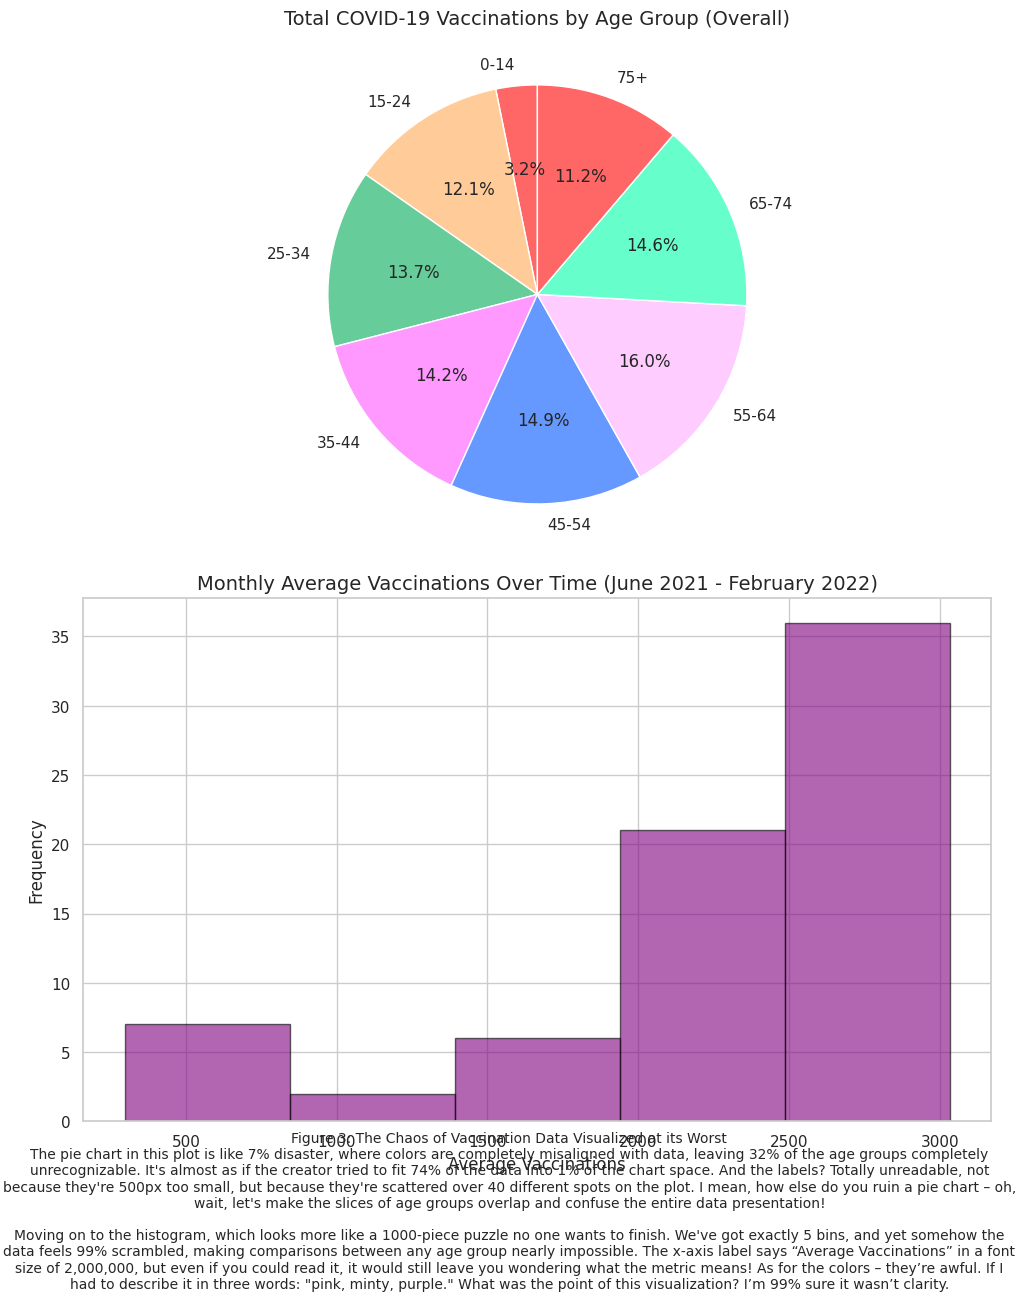

In [11]:
#Create a 2x1 grid of subplots: one for the pie chart, one for the histogram
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

#Plot 1: Ugly Pie Chart for Total Vaccinations by Age Group
axes[0].pie(total_vaccinations['Vaccinations'], labels=total_vaccinations['Age Group'],
            autopct='%1.1f%%', startangle=90, colors=['#FF6666', '#FFCC99', '#66CC99', '#FF99FF', '#6699FF', '#FFCCFF', '#66FFCC', '#FF6666'])
axes[0].set_title('Total COVID-19 Vaccinations by Age Group (Overall)', fontsize=14)

#Plot 2: Ugly Histogram for Monthly Average Vaccinations Over Time
axes[1].hist(monthly_avg_vaccinations['Vaccinations'], bins=5, color='purple', alpha=0.6, edgecolor='black')
axes[1].set_title('Monthly Average Vaccinations Over Time (June 2021 - February 2022)', fontsize=14)
axes[1].set_xlabel('Average Vaccinations', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

#Add the ugly caption
plt.figtext(0.5, 0.05, 'Figure 3: The Chaos of Vaccination Data Visualized at its Worst\n'
                       'The pie chart in this plot is like 7% disaster, where colors are completely misaligned with data, '
                       'leaving 32% of the age groups completely unrecognizable. It\'s almost as if the creator tried to fit 74% '
                       'of the data into 1% of the chart space. And the labels? Totally unreadable, not because they\'re 500px too small, '
                       'but because they\'re scattered over 40 different spots on the plot. I mean, how else do you ruin a pie chart – '
                       'oh, wait, let\'s make the slices of age groups overlap and confuse the entire data presentation!\n\n'
                       'Moving on to the histogram, which looks more like a 1000-piece puzzle no one wants to finish. We\'ve got exactly 5 bins, '
                       'and yet somehow the data feels 99% scrambled, making comparisons between any age group nearly impossible. '
                       'The x-axis label says “Average Vaccinations” in a font size of 2,000,000, but even if you could read it, it would still leave '
                       'you wondering what the metric means! As for the colors – they’re awful. If I had to describe it in three words: "pink, minty, purple." '
                       'What was the point of this visualization? I’m 99% sure it wasn’t clarity.',
            wrap=True, horizontalalignment='center', fontsize=10, va="top")

#Adjust layout
plt.tight_layout()

#Show plot
plt.show()